In [444]:
import pandas as pd
import datetime

In [445]:
df = pd.read_csv("datasets/day.csv")

In [446]:
df.size

11696

In [447]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [448]:
df['temp_celsius'] = (df['temp']*41).round()

In [449]:
df['temp_celsius_realfeel'] = (df['atemp']*50).round()

In [450]:
df['temp_celsius']

0      14.0
1      15.0
2       8.0
3       8.0
4       9.0
       ... 
726    10.0
727    10.0
728    10.0
729    10.0
730     9.0
Name: temp_celsius, Length: 731, dtype: float64

In [451]:
df['dteday'] = pd.to_datetime(df['dteday'])



In [452]:
df = df.iloc[:,[0,1,17,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]

In [453]:
df.dtypes

instant                           int64
dteday                   datetime64[ns]
temp_celsius_realfeel           float64
season                            int64
yr                                int64
mnth                              int64
holiday                           int64
weekday                           int64
workingday                        int64
weathersit                        int64
temp                            float64
atemp                           float64
hum                             float64
windspeed                       float64
casual                            int64
registered                        int64
cnt                               int64
temp_celsius                    float64
dtype: object

In [454]:
df.rename(columns={'dteday': 'dte', 'season':'season_num'}, inplace=True)

In [455]:
df['season_name'] = df['season_num'].apply(lambda x: 'Winter' if x == 1 else 'Spring' if x == 2 else 'Summer' if x == 3 else 'Fall')

In [456]:
df['season_name'].value_counts()

Summer    188
Spring    184
Winter    181
Fall      178
Name: season_name, dtype: int64

In [457]:
seasons_grouped = df.groupby('season_name')

In [458]:
seasons_grouped['temp_celsius'].mean()

season_name
Fall      17.331461
Spring    22.331522
Summer    28.994681
Winter    12.182320
Name: temp_celsius, dtype: float64

In [459]:
seasons_grouped['cnt'].mean()

season_name
Fall      4728.162921
Spring    4992.331522
Summer    5644.303191
Winter    2604.132597
Name: cnt, dtype: float64

In [460]:
import requests
import json 

class WeatherData():


    def __init__(self):

        self.base_url = "https://archive-api.open-meteo.com/v1/archive"
        self.coordinates = '?latitude=38.8951&longitude=-77.0364'
        self.timezone = '&timezone=America%2FNew_York'

    def get_weather(self, start_date = '2011-01-01', end_date = '2012-12-31',
                    daily_list = ['weathercode,temperature_2m_max,temperature_2m_min,precipitation_sum',
                                  'windspeed_10m_max,winddirection_10m_dominant,shortwave_radiation_sum']):
        
        timeframe = ('&start_date='+ start_date + '&end_date=' + end_date)
        daily = ('&daily='+ ",".join((daily_list)))
        api_url = (self.base_url + self.coordinates + timeframe + daily + self.timezone)
        resp = requests.get(api_url)
        weather_data = resp.json()
        
        return weather_data
    
    def concat_to_df(self,df,my_weather):
        # Extract the data
        for measure in my_weather['daily']:

            daily_measure = my_weather['daily'][measure]
            unit_of_measure = my_weather['daily_units'][measure]

            # Iterate over the rows in the DataFrame
            for index, row in df.iterrows():
                custom_index = index 
                measure_value = daily_measure[custom_index]

                # Assign the value to the respective row in the DataFrame
                name = measure + '_' + unit_of_measure
                df.at[index, name] = measure_value

            
dc_weather = WeatherData()
my_weather = dc_weather.get_weather()
dc_weather.concat_to_df(df, my_weather)

In [461]:
pd.set_option('display.max_columns', None)
df.head()

,instant,dte,temp_celsius_realfeel,season_num,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_celsius,season_name,time_iso8601,weathercode_wmo code,temperature_2m_max_°C,temperature_2m_min_°C,precipitation_sum_mm,windspeed_10m_max_km/h,winddirection_10m_dominant_°,shortwave_radiation_sum_MJ/m²
0,1,2011-01-01,18.0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,14.0,Winter,2011-01-01,61.0,14.7,1.3,2.5,17.7,197.0,5.59
1,2,2011-01-02,18.0,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,15.0,Winter,2011-01-02,55.0,13.8,1.8,3.0,18.9,299.0,1.25
2,3,2011-01-03,9.0,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,8.0,Winter,2011-01-03,1.0,3.3,-3.0,0.0,17.4,299.0,10.22
3,4,2011-01-04,11.0,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8.0,Winter,2011-01-04,1.0,6.8,-4.1,0.0,11.2,215.0,9.93
4,5,2011-01-05,11.0,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,9.0,Winter,2011-01-05,1.0,4.1,-4.1,0.0,13.9,314.0,9.22


In [462]:
import math

wind_direction_categories = {
    'N': (337.5, 22.5),
    'NE': (22.5, 67.5),
    'E': (67.5, 112.5),
    'SE': (112.5, 157.5),
    'S': (157.5, 202.5),
    'SW': (202.5, 247.5),
    'W': (247.5, 292.5),
    'NW': (292.5, 337.5)
}

def map_wind_direction(degrees):
    for direction, (start, end) in wind_direction_categories.items():
        if start <= degrees < end:
            return direction
    return ''

df['wind_direction'] = df['winddirection_10m_dominant_°'].apply(lambda x: map_wind_direction(x))

df.head()

,instant,dte,temp_celsius_realfeel,season_num,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_celsius,season_name,time_iso8601,weathercode_wmo code,temperature_2m_max_°C,temperature_2m_min_°C,precipitation_sum_mm,windspeed_10m_max_km/h,winddirection_10m_dominant_°,shortwave_radiation_sum_MJ/m²,wind_direction
0,1,2011-01-01,18.0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,14.0,Winter,2011-01-01,61.0,14.7,1.3,2.5,17.7,197.0,5.59,S
1,2,2011-01-02,18.0,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,15.0,Winter,2011-01-02,55.0,13.8,1.8,3.0,18.9,299.0,1.25,NW
2,3,2011-01-03,9.0,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,8.0,Winter,2011-01-03,1.0,3.3,-3.0,0.0,17.4,299.0,10.22,NW
3,4,2011-01-04,11.0,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8.0,Winter,2011-01-04,1.0,6.8,-4.1,0.0,11.2,215.0,9.93,SW
4,5,2011-01-05,11.0,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,9.0,Winter,2011-01-05,1.0,4.1,-4.1,0.0,13.9,314.0,9.22,NW


In [463]:
wind_grouped = df.groupby('windspeed_10m_max_km/h')

In [464]:
df['windy_cat'] = df['windspeed_10m_max_km/h'].apply(lambda x: 'low' if x <= 20 else 
                                                     'medium' if x <= 30 else 
                                                     'high')

In [465]:
windy = df.groupby(['windy_cat'])

In [466]:
df['windspeed_10m_max_km/h'].describe()

count    731.000000
mean      15.274966
std        5.718661
min        6.400000
25%       11.200000
50%       13.900000
75%       18.300000
max       43.200000
Name: windspeed_10m_max_km/h, dtype: float64

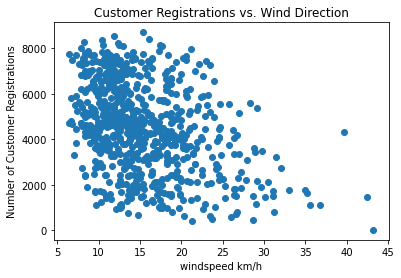

In [467]:
import matplotlib.pyplot as plt

# Plotting the data
plt.scatter(df['windspeed_10m_max_km/h'], df['cnt'])
plt.xlabel('windspeed km/h')
plt.ylabel('Number of Customer Registrations')
plt.title('Customer Registrations vs. Wind Direction')
plt.show()

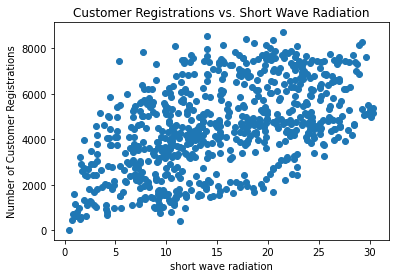

In [468]:
import matplotlib.pyplot as plt

# Plotting the data
plt.scatter(df['shortwave_radiation_sum_MJ/m²'], df['cnt'])
plt.xlabel('short wave radiation')
plt.ylabel('Number of Customer Registrations')
plt.title('Customer Registrations vs. Short Wave Radiation')
plt.show()

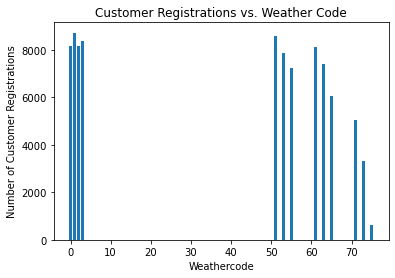

In [469]:
import matplotlib.pyplot as plt

# Plotting the data
plt.bar(df['weathercode_wmo code'], df['cnt'])
plt.xlabel('Weathercode')
plt.ylabel('Number of Customer Registrations')
plt.title('Customer Registrations vs. Weather Code')
plt.show()

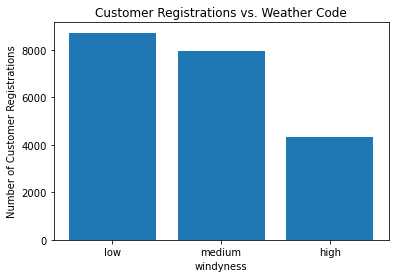

In [470]:
import matplotlib.pyplot as plt

# Plotting the data
plt.bar(df['windy_cat'], df['cnt'])
plt.xlabel('windyness')
plt.ylabel('Number of Customer Registrations')
plt.title('Customer Registrations vs. Weather Code')
plt.show()